<a href="https://colab.research.google.com/github/technologyhamed/Neuralnetwork/blob/Single/LogicaGateOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [348]:
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [349]:
#Returns values that sums to one.
#activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# derivative of Sigmoid Function
def sigmoid_derivative(sx):
    return sx * (1 - sx)

#step function 
def step (net):
    if net >= 0:
        return 1
    else:
        return 0       

In [350]:
#train_data and Target Or | And
x_data = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])

y_or = np.array(
    [
        [0],
        [1],
        [1],
        [1]])

y_and = np.array(
    [
        [0],
        [1],
        [1],
        [1]])

In [351]:
weights=np.random.uniform(size=3)
print(weights)

[0.44130476 0.26622625 0.99808022]


In [352]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [353]:
 def gradient(node, exp, output):
        return node * (exp - output)  

In [354]:
def Pridict(train,weights):
     W1=np.dot(weights[1] , train[0])
     W2=np.dot(weights[2] , train[1])
     #return 1.0 if Z >= 0.0 else 0.0 
     return sigmoid(W1+W2 + weights[0])

In [355]:
def update_weights(train,target, yhat,weights,learning_rate):
  e = []
  error = target - yhat
  e.append(error)
  dEdW_1 = error * sigmoid_derivative(yhat) *learning_rate * train[0] 
  dEdW_2 = error * sigmoid_derivative(yhat) *learning_rate * train[1]  
  dEdW_0 = error * sigmoid_derivative(yhat) *learning_rate 

  weights[0] = weights[0] +  dEdW_0
  weights[1] = weights[1] +  dEdW_1
  weights[2] = weights[2] +  dEdW_2    
  return weights        


In [356]:

#Train a single layer perceptron.

def Train(x_data,y,weights,learning_rate=0.1,Epoch=500): 


 for ep in range(Epoch):  
  correct_counter = 0
  #for train, target in cycle(zip(x_data,y)):
  for row in range(len(x_data)):
    # end if all points are correctly classified
    if correct_counter == len(x_data):
       break
    yhat = Pridict(x_data[row],weights)
       #node_val = train
    if yhat == y[row]:
         correct_counter += 1
    else:
        weights=update_weights(x_data[row],y[row], yhat,weights,learning_rate)
        #print(weights)
        correct_counter = 0  
                   
 return weights
  

In [357]:
def Plots(x_data,weights):

 x_range = np.arange(-0.1, 1.1, 0.1)
 y_range = np.arange(-0.1, 1.1,0.1)
 xx, yy = np.meshgrid(x_range, y_range)
 plt.style.use('fast')
 fig, ax = plt.subplots(figsize=(6, 6))
 ax.scatter(0, 0, c='r', label="Class 0")
 ax.scatter(0, 1, c='b', label="Class 1")
 ax.scatter(1, 0, c='b', label="Class 1")
 ax.scatter(1, 1, c='b', label="Class 1")
 plt.xlim(-0.1, 1.1)
 plt.ylim(-0.1, 1.1)


 y = (-(weights[1])/(weights[2]) * yy ) - (weights[0]/weights[2])

 plt.plot(x_range , y,linestyle='solid',color='black');

 plt.grid()
 plt.show() 

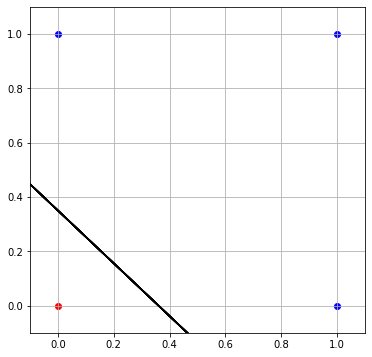

In [358]:
weights=Train(x_data,y_and,weights,0.1)
Plots(x_data,weights)